In [1]:
%matplotlib inline
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
import mdale.ale as ale
import mdale.dale as dale
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets


In [2]:
def generate_samples(N, seed):
    if seed is not None:
        np.random.seed(seed)

    x1 = np.random.uniform(size=N)
    x2 = np.random.normal(size=N)
    return np.stack([x1, x2]).T


def f(x):
    return np.cos(2*np.pi*x[:,0]) + np.cos(2*np.pi*x[:,1])


def f_der(x):
    return np.stack([-2*np.pi*np.sin(2*np.pi*x[:,0]), 2*np.pi*np.cos(2*np.pi*x[:,1])], axis=-1)

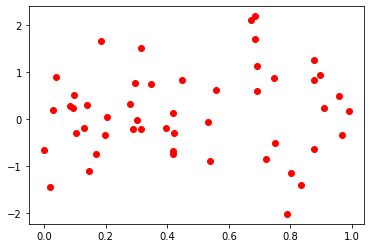

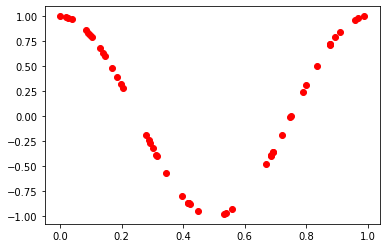

In [3]:
seed = 1
N = 50
X = generate_samples(N, seed)
y = f(X)
dy = f_der(X)


plt.figure()
plt.plot(X[:,0], X[:,1], "ro")
plt.show(block=False)

plt.figure()
plt.plot(X[:,0], np.cos(2*np.pi*X[:,0]), "ro")
plt.show(block=False)


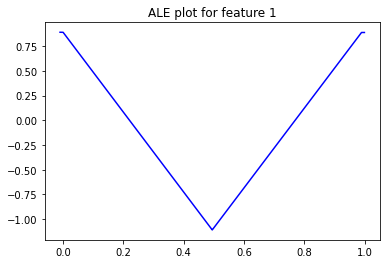

In [4]:
# ALE
K = 2
ale_inst = ale.ALE(points=X, f=f)
ale_inst.fit(features=[0, 1], k=K)
ale_inst.plot(s=0, block=False)

In [5]:
X.shape

(50, 2)

interactive(children=(IntSlider(value=50, description='bins', min=1), Output()), _dom_classes=('widget-interac…

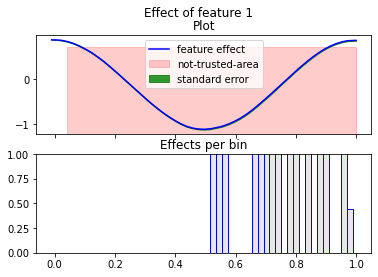

In [6]:
dale_inst = dale.DALE(points=X, f=f, f_der=f_der)
def plot(bins):
    dale_inst.fit(features=[0, 1], k=bins)
    dale_inst.plot(s=0, block=False)
    plt.show()

interactive_plot = widgets.interactive(plot, bins=(1, 100, 1))
output = interactive_plot.children[-1]
# output.layout.height = '350px'
interactive_plot